In [17]:
import pickle
from pprint import pprint

pkl_path = "/Volumes/LaCie/000_POSTDOC_2025/long_high_res/benchmarks/benchmark_results.pkl"

with open(pkl_path, "rb") as f:
    results = pickle.load(f)   # dict keyed by (kind, latent_dim)

print(f"Loaded {len(results)} runs")
# Peek at the keys
print(list(results.keys())[:5])

# Print a tiny summary
for (kind, d), r in sorted(results.items()):
    print(f"{kind:10s} d={d:2d} | test MSE={r['test_mse']:.4e}  MAE={r['test_mae']:.4e}")


Loaded 12 runs
[('ae', 8), ('sae', 8), ('vae', 8), ('ae_koop', 8), ('sae_koop', 8)]
ae         d= 8 | test MSE=7.3422e-01  MAE=5.3239e-01
ae         d=16 | test MSE=5.1335e-01  MAE=4.5216e-01
ae_koop    d= 8 | test MSE=7.0624e-01  MAE=5.2590e-01
ae_koop    d=16 | test MSE=5.1232e-01  MAE=4.4830e-01
kvae       d= 8 | test MSE=7.1037e-01  MAE=5.2349e-01
kvae       d=16 | test MSE=8.3284e-01  MAE=5.8544e-01
sae        d= 8 | test MSE=7.3931e-01  MAE=5.3711e-01
sae        d=16 | test MSE=5.2081e-01  MAE=4.5285e-01
sae_koop   d= 8 | test MSE=7.7729e-01  MAE=5.5260e-01
sae_koop   d=16 | test MSE=5.8926e-01  MAE=4.8450e-01
vae        d= 8 | test MSE=7.1891e-01  MAE=5.2651e-01
vae        d=16 | test MSE=5.3375e-01  MAE=4.6310e-01


In [24]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

rows = []
for (kind, d), r in results.items():
    rows.append({
        "kind": kind,
        "latent_dim": d,
        "test_mse": r["test_mse"],
        "test_mae": r["test_mae"],
        "checkpoint": r["checkpoint"],
        "eig_rho": r["eig_summary"]["rho"],
        "eig_stable_frac": r["eig_summary"]["p_stable"],
    })
df = pd.DataFrame(rows).sort_values(["kind", "latent_dim"])
print(df)


        kind  latent_dim  test_mse  test_mae  \
0         ae           8  0.734221  0.532386   
6         ae          16  0.513350  0.452165   
3    ae_koop           8  0.706237  0.525904   
9    ae_koop          16  0.512318  0.448304   
5       kvae           8  0.710367  0.523490   
11      kvae          16  0.832837  0.585437   
1        sae           8  0.739309  0.537105   
7        sae          16  0.520811  0.452854   
4   sae_koop           8  0.777294  0.552600   
10  sae_koop          16  0.589264  0.484504   
2        vae           8  0.718908  0.526514   
8        vae          16  0.533750  0.463105   

                                           checkpoint   eig_rho  \
0   /Volumes/LaCie/000_POSTDOC_2025/long_high_res/...  0.996473   
6   /Volumes/LaCie/000_POSTDOC_2025/long_high_res/...  0.997590   
3   /Volumes/LaCie/000_POSTDOC_2025/long_high_res/...  0.999716   
9   /Volumes/LaCie/000_POSTDOC_2025/long_high_res/...  1.000012   
5   /Volumes/LaCie/000_POSTDOC_2025/long

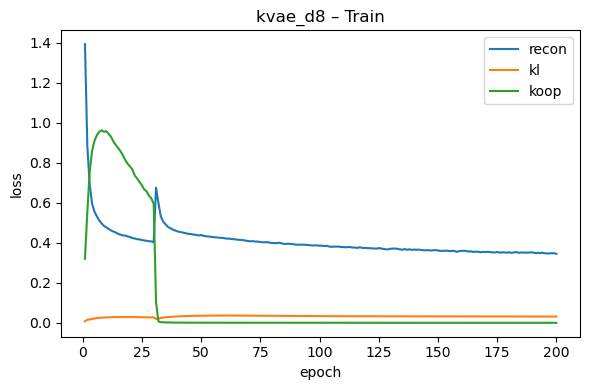

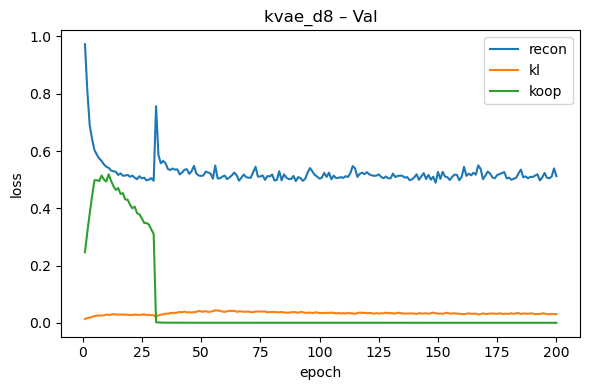

In [ ]:



def plot_hist(hist, title):
    arr = {k: [h[k] for h in hist] for k in hist[0].keys()}
    xs = np.arange(1, len(hist)+1)
    plt.figure(figsize=(6,4))
    for k in ("recon","kl","koop"):
        if k in arr:
            plt.plot(xs, arr[k], label=k)
    plt.xlabel("epoch"); plt.ylabel("loss"); plt.title(title); plt.legend(); plt.tight_layout()
    plt.show()

kind, d = "kvae", 8
run = results[(kind, d)]
train_hist = run["train_hist"]   # list of dicts: {"recon", "kl", "koop", "beta"}
val_hist   = run["val_hist"]
plot_hist(train_hist, f"{kind}_d{d} – Train")
plot_hist(val_hist,   f"{kind}_d{d} – Val")


In [20]:
hist = val_hist
arr = {k: [h[k] for h in hist] for k in hist[0].keys()}

In [21]:
arr

{'recon': [0.9728906899690628,
  0.8101907074451447,
  0.6898171603679657,
  0.6418609619140625,
  0.6033457815647125,
  0.5875239819288254,
  0.5741249173879623,
  0.5654993876814842,
  0.5531666204333305,
  0.5452205464243889,
  0.5411031171679497,
  0.5321043655276299,
  0.5293374210596085,
  0.5278050303459167,
  0.5164999291300774,
  0.5219761803746223,
  0.5136120840907097,
  0.5145052447915077,
  0.5167001634836197,
  0.5101014003157616,
  0.5141638889908791,
  0.5066627636551857,
  0.5017375946044922,
  0.5120796635746956,
  0.5046057999134064,
  0.506827250123024,
  0.4974081218242645,
  0.5002498626708984,
  0.5053369626402855,
  0.4961736649274826,
  0.7566318362951279,
  0.5865800902247429,
  0.5573804751038551,
  0.5654541552066803,
  0.5575513765215874,
  0.537142314016819,
  0.5337343066930771,
  0.5389817357063293,
  0.5347958952188492,
  0.5359854772686958,
  0.5182759985327721,
  0.5249538496136665,
  0.5347296968102455,
  0.5364557504653931,
  0.5201050415635109,
  0

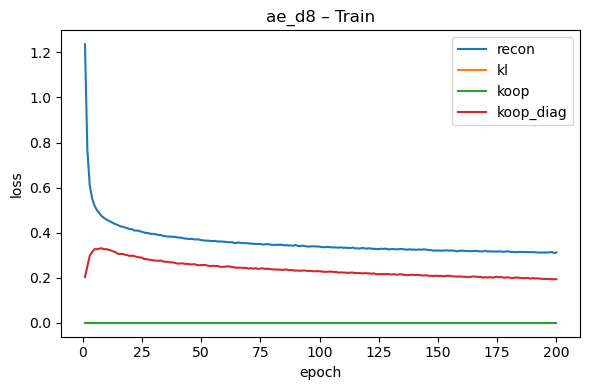

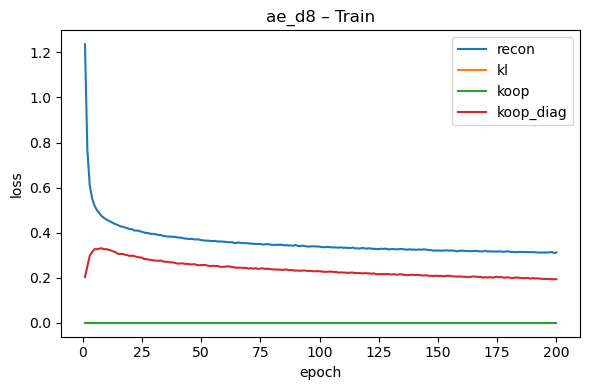

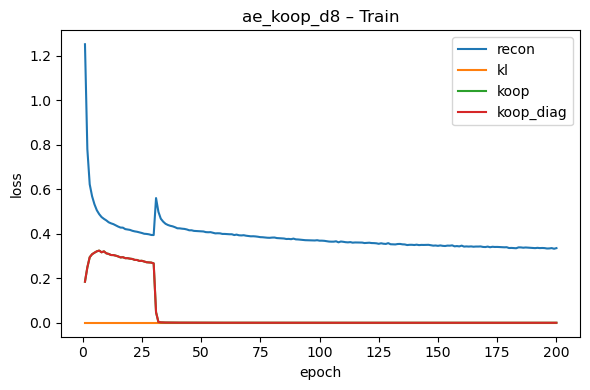

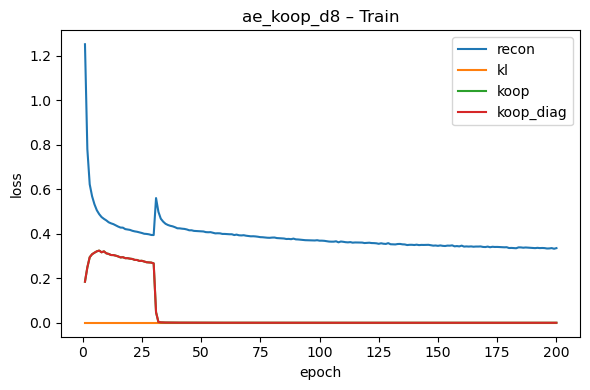

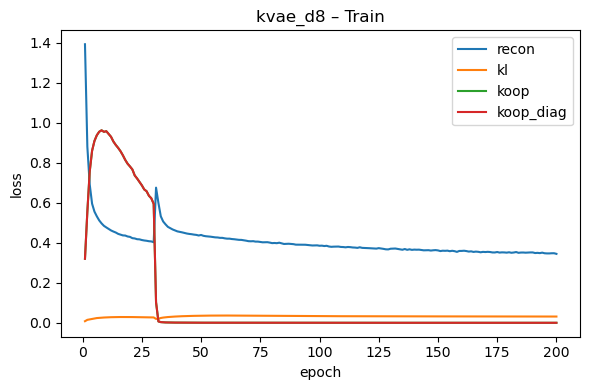

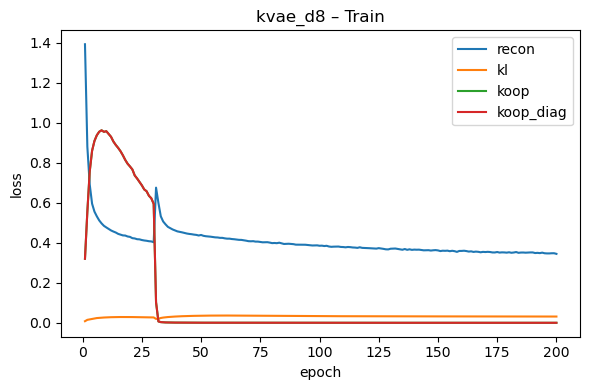

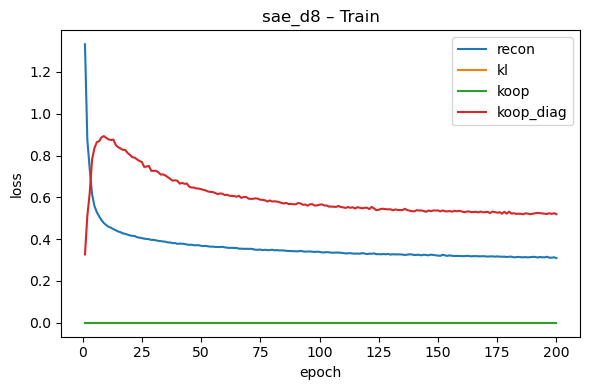

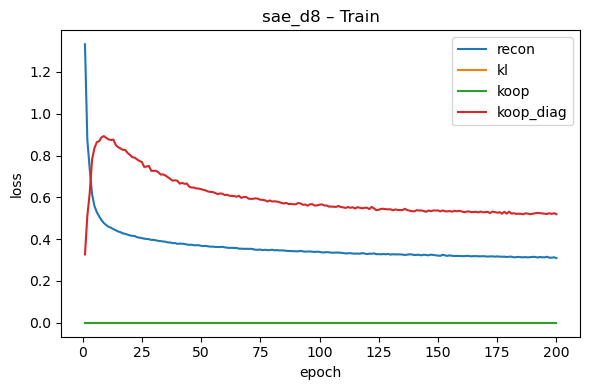

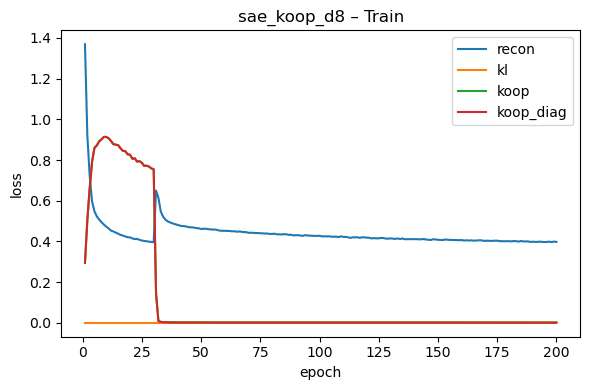

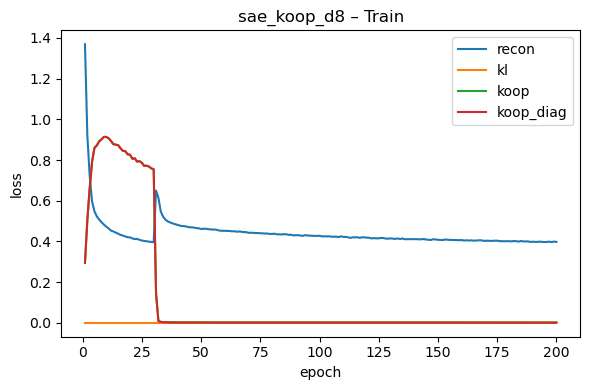

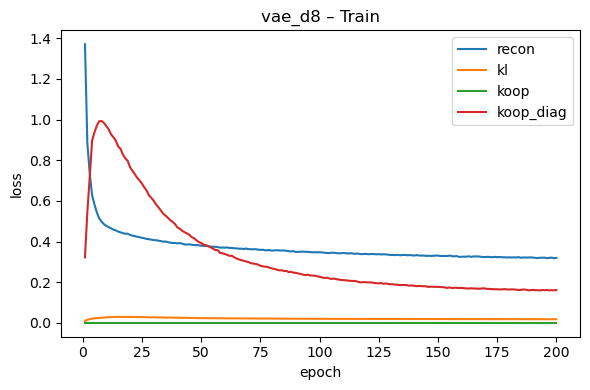

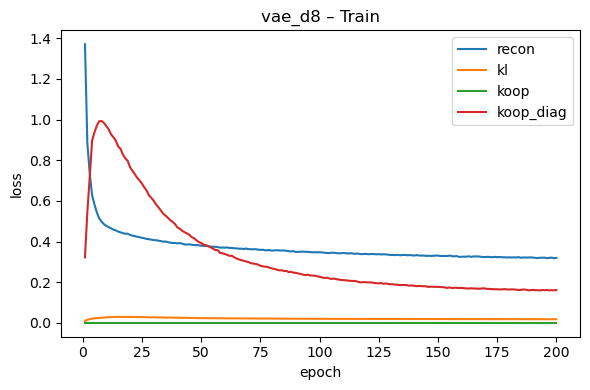

In [40]:
#kind, d = "kvae", 8
d=8
for kind in df.kind.values:
    run = results[(kind, d)]
    train_hist = run["train_hist"]   # list of dicts: {"recon", "kl", "koop", "beta"}
    val_hist   = run["val_hist"]
    plot_hist(train_hist, f"{kind}_d{d} – Train")


def plot_hist(hist, title):
    arr = {k: [h[k] for h in hist] for k in hist[0].keys()}
    xs = np.arange(1, len(hist)+1)
    plt.figure(figsize=(6,4))
    for k in ("recon","kl","koop", "koop_diag"):
        if k in arr:
            plt.plot(xs, arr[k], label=k)
    plt.xlabel("epoch"); plt.ylabel("loss"); plt.title(title); plt.legend(); plt.tight_layout()
    plt.show()

    #plot_hist(val_hist,   f"{kind}_d{d} – Val")


In [41]:
for kind in sorted(set(df.loc[df.latent_dim == d, 'kind'])):
    plot_hist(train_hist, f"{kind}_d{d} – Train", kl_scale=None)  # if you want KL × 40 overlay
# plot_hist(val_hist,   f"{kind}_d{d} – Val",   kl_scale=40)


TypeError: plot_hist() got an unexpected keyword argument 'kl_scale'

In [1]:
import xarray as xr

In [2]:
ds = xr.open_dataset("/Volumes/LaCie/000_POSTDOC_2025/long_high_res/3D/split_15.nc")

In [3]:
ds_2d = xr.open_dataset("/Volumes/LaCie/000_POSTDOC_2025/long_high_res/2D/split_15.nc")

In [4]:
ds_2d

<xarray.Dataset> Size: 1GB
Dimensions:  (x: 128, y: 128, time: 541)
Coordinates:
  * x        (x) float32 512B 0.0 1e+03 2e+03 ... 1.25e+05 1.26e+05 1.27e+05
  * y        (y) float32 512B 0.0 1e+03 2e+03 ... 1.25e+05 1.26e+05 1.27e+05
  * time     (time) float32 2kB 40.77 40.77 40.77 40.77 ... 41.52 41.52 41.52
Data variables: (12/29)
    Prec     (time, y, x) float32 35MB ...
    SHF      (time, y, x) float32 35MB ...
    LHF      (time, y, x) float32 35MB ...
    LWNS     (time, y, x) float32 35MB ...
    LWNSC    (time, y, x) float32 35MB ...
    LWNT     (time, y, x) float32 35MB ...
    ...       ...
    U850     (time, y, x) float32 35MB ...
    V850     (time, y, x) float32 35MB ...
    ZC       (time, y, x) float32 35MB ...
    TB       (time, y, x) float32 35MB ...
    ZE       (time, y, x) float32 35MB ...
    CLDC     (time, y, x) float32 35MB ...
Attributes:
    history:  Mon May 19 10:43:04 2025: ncrcat RCE_T300_U8.0_SAM1MOM_B1_128x1...
    NCO:      netCDF Operators version 5.0.1 (Homepage = http://nco.sf.net, C...

In [7]:
lw = ds_2d.LWNT.values.reshape(ds_2d.LWNT.values.shape[0], -1)   # shape (T, Npix)


In [9]:
import numpy as np 
p35 = np.percentile(lw, 35)
p65 = np.percentile(lw, 65)

# 0 shallow, 1 intermediate, 2 deep
label = np.zeros_like(lw, dtype=int)
label[lw < p35] = 2       # deep (coldest / strongest LW anomaly)
label[(lw >= p35) & (lw < p65)] = 1
# shallow = remainder


In [10]:
Npix = lw.shape[1]

N_deep = np.sum(label == 2, axis=1)
N_shallow = np.sum(label == 0, axis=1)
N_intermediate = np.sum(label == 1, axis=1)


In [12]:
ratio_ds = N_deep / (N_shallow + 1e-8)
frac_deep = N_deep / Npix
frac_shallow = N_shallow / Npix
mask = N_deep + N_shallow
frac_deep2 = N_deep / (mask + 1e-8)

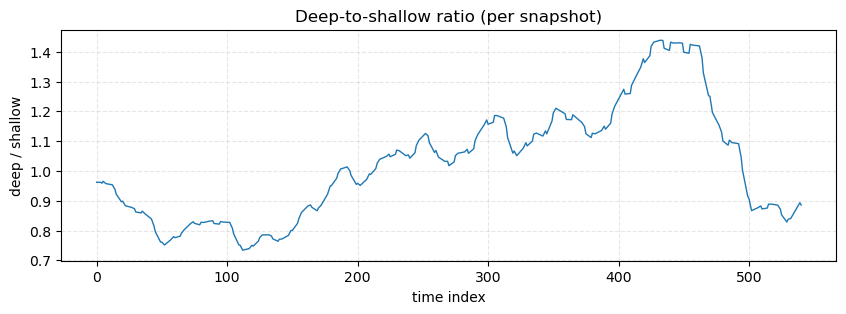

In [15]:
import matplotlib.pyplot as plt

from scipy.ndimage import uniform_filter1d
ratio_ds_smooth = uniform_filter1d(ratio_ds, size=10)


plt.figure(figsize=(10,3))
plt.plot(ratio_ds_smooth, lw=1)
plt.xlabel("time index")
plt.ylabel("deep / shallow")
plt.title("Deep-to-shallow ratio (per snapshot)")
plt.grid(True, ls='--', alpha=0.3)
plt.show()
